In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!sudo apt-get install -y python-dev pkg-config
!sudo apt-get install -y \
    libavformat-dev libavcodec-dev libavdevice-dev \
    libavutil-dev libswscale-dev libswresample-dev libavfilter-dev
!pip install av
!pip install -i https://test.pypi.org/simple/ supportlib
import supportlib.gettingdata as getdata
import av
import glob
import os
import time
import tqdm
import datetime
import argparse

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
python-dev is already the newest version (2.7.15~rc1-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libavcodec-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavformat-dev set to manually installed.
libavutil-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavutil-dev set to manually installed.
libswresample-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libswresample-dev set to manually installed.
libswscale-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libswscale-dev set to manually installed.
The following additional packages will be installed:
  libpostproc-dev
The f

# Preprocessing Datasets

In [ ]:
def video_to_frame(path,out_path):
    vidcap = cv2.VideoCapture(path)
    success,image = vidcap.read()
    count = 0
    while success:
      cv2.imwrite(os.path.join(out_path,"{}.jpg".format(count)), image)
      success,image = vidcap.read()
      count += 1

In [ ]:
def extract_frames(video_path):
    frames = []
    try:
      video = av.open(video_path)
      for frame in video.decode(0):
        try:
          yield frame.to_image()
        except:
          print("Fail inner")
    except:
      print("FAIL x")

In [ ]:
%cd /content/drive/My Drive/Datasets

/content/drive/My Drive/Datasets


In [ ]:
!ls

MioDataset  RisultatoMD  RisultatoMDX


In [ ]:
# UCF3
from tqdm.autonotebook import tqdm
path = '/content/drive/My Drive/Datasets/MioDataset' # '/content/Anomaly_Dataset/Anomaly_Videos/Anomaly-Videos-Part-1'
result = '/content/drive/My Drive/Datasets/RisultatoMD' # '/content/Dataset'

for i in tqdm(os.listdir(path)):
  p1 = os.path.join(path,i)
  r1 = os.path.join(result,i)
  if os.path.exists(r1):
            continue
  os.makedirs(r1,exist_ok = True)
  for j in os.listdir(p1):
    vid_path = os.path.join(p1,j)
    r2 = os.path.join(r1,j[:-4])
    os.makedirs(r2,exist_ok = True)
    for j, frame in enumerate((extract_frames(vid_path))):
      frame.save(os.path.join(r2, f"{j}.jpg"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  


In [ ]:
# UCF3
path = '/content/drive/My Drive/Datasets/RisultatoMD'
res = '/content/drive/My Drive/Datasets/RisultatoMDX'

In [ ]:
# path = '/content/Dataset'
# res = '/content/crimeX'
seq_length = 16
import numpy as np
import cv2

def preprocess_data(seq_length,path,res):
  dir = os.listdir(path)
  for i in tqdm(dir):
      p1 = os.path.join(path,i)
      r1 = os.path.join(res,i)
      os.makedirs(r1,exist_ok = True)
      for j in os.listdir(p1):
          p2 = os.path.join(p1,j)
          r2 = os.path.join(r1,j)
          l = 0
          skip_length = int(len(os.listdir(p2))/seq_length)
          for m in range(10):
              k = m
              while(l!=seq_length):
                p3 = os.path.join(p2,str(k) + ".jpg")
                try:
                  img = cv2.imread(p3)
                  img = cv2.resize(img,(128,128))
                  if(k==0):
                    img1 = img
                  else:
                    img1 = np.append(img1,img,axis = 1)
                except:
                  print("oh Shit ",p3)
                k = k+skip_length
                l = l+1  
              cv2.imwrite(r2 + str(m)+".jpg",img1)

In [ ]:
preprocess_data(seq_length,path,res)

oh Shit  /content/drive/My Drive/Datasets/RisultatoMD/Risse/af23710e-d89f-4b17-a3d4-cf0a71a3c28f/0.jpg
oh Shit  /content/drive/My Drive/Datasets/RisultatoMD/Risse/af23710e-d89f-4b17-a3d4-cf0a71a3c28f/0.jpg
oh Shit  /content/drive/My Drive/Datasets/RisultatoMD/Risse/af23710e-d89f-4b17-a3d4-cf0a71a3c28f/0.jpg
oh Shit  /content/drive/My Drive/Datasets/RisultatoMD/Risse/af23710e-d89f-4b17-a3d4-cf0a71a3c28f/0.jpg
oh Shit  /content/drive/My Drive/Datasets/RisultatoMD/Risse/af23710e-d89f-4b17-a3d4-cf0a71a3c28f/0.jpg
oh Shit  /content/drive/My Drive/Datasets/RisultatoMD/Risse/af23710e-d89f-4b17-a3d4-cf0a71a3c28f/0.jpg
oh Shit  /content/drive/My Drive/Datasets/RisultatoMD/Risse/af23710e-d89f-4b17-a3d4-cf0a71a3c28f/0.jpg
oh Shit  /content/drive/My Drive/Datasets/RisultatoMD/Risse/af23710e-d89f-4b17-a3d4-cf0a71a3c28f/0.jpg
oh Shit  /content/drive/My Drive/Datasets/RisultatoMD/Risse/af23710e-d89f-4b17-a3d4-cf0a71a3c28f/0.jpg
oh Shit  /content/drive/My Drive/Datasets/RisultatoMD/Risse/af23710e-d89f

# TRAIN NETWORK

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/SlowFast

/content/drive/My Drive/Colab Notebooks/SlowFast


In [ ]:
import torchvision
import torch
from torch import nn
import torch.nn.functional as F
import torchvision.models as models
import torch.optim as optim
import copy
import os
from tqdm.autonotebook import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
import cv2
import sys

In [ ]:
# UCF3
data_path = '/content/drive/My Drive/Datasets/RisultatoMDX'
path = '/content/drive/My Drive/Datasets/RisultatoMDX'
weights_dir = '/content/drive/My Drive/Datasets/weights_UCF3'

In [ ]:
classes = os.listdir(data_path)
decoder = {}
for i in range(len(classes)):
    decoder[classes[i]] = i
encoder = {}
for i in range(len(classes)):
    encoder[i] = classes[i]

In [ ]:
id = list()
for i in os.listdir(path):
  p1 = os.path.join(path,i)
  for j in os.listdir(p1):
    p2 = os.path.join(p1,j)
    id.append((i,p2))

In [ ]:
class video_dataset(Dataset):
    def __init__(self,frame_list,sequence_length = 16,transform = None):
        self.frame_list = frame_list
        self.transform = transform
        self.sequence_length = sequence_length
    def __len__(self):
        return len(self.frame_list)
    def __getitem__(self,idx):
        label,path = self.frame_list[idx]
        img = cv2.imread(path)
        seq_img = list()
        for i in range(16):
          img1 = img[:,128*i:128*(i+1),:]
          if(self.transform):
            img1 = self.transform(img1)
          seq_img.append(img1)
        seq_image = torch.stack(seq_img)
        seq_image = seq_image.reshape(3,16,im_size,im_size)
        return seq_image,decoder[label]

In [ ]:
# Train/Test Split

im_size = 128
mean = [0.4889, 0.4887, 0.4891]
std = [0.2074, 0.2074, 0.2074]


train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.RandomRotation(degrees=10),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

train_data = video_dataset(id, sequence_length = 16,transform = train_transforms)

########################   Proporzione 70 / 30
# dim : 100 = X : 80
dim = len(id)
print("len(id) : ", dim)
train_dim = int((dim*70)/100)
test_dim = int(dim - train_dim)
print("train_dim : ", train_dim, " test_dim : ",test_dim)
test_ds, train_ds = torch.utils.data.random_split(train_data, (test_dim, train_dim))
print(test_ds, train_ds)
print('Test: ', test_ds.indices, '\nTrain: ',train_ds.indices)
print('len(Test): ', len(test_ds.indices), '\nlen(Train): ',len(train_ds.indices))
########################

train_loader = DataLoader(train_ds, batch_size = 8, num_workers = 4 , shuffle = True)
dataloaders = {'train':train_loader}
test_loader = DataLoader(test_ds, batch_size = 8, num_workers = 4 , shuffle = True)
dataloaders_test = {'test':test_loader}

# train_loader = DataLoader(train_data, batch_size = 8, num_workers = 4 , shuffle = True)
# dataloaders = {'train':train_loader}

len(id) :  1530
train_dim :  1071  test_dim :  459
<torch.utils.data.dataset.Subset object at 0x7f46d92e7588> <torch.utils.data.dataset.Subset object at 0x7f46d92e7da0>
Test:  [1088, 295, 1203, 173, 984, 1351, 1078, 486, 1202, 1310, 1175, 869, 52, 945, 1303, 1336, 764, 11, 1287, 282, 1444, 66, 234, 96, 620, 1514, 1249, 1335, 250, 1016, 10, 360, 597, 692, 931, 329, 1503, 1265, 753, 1397, 944, 113, 190, 207, 48, 90, 177, 1023, 1034, 180, 1181, 1388, 914, 478, 548, 368, 410, 519, 414, 1382, 1362, 725, 1293, 855, 441, 1258, 1019, 542, 952, 1304, 98, 139, 1020, 1410, 1011, 1064, 218, 1516, 694, 123, 476, 1040, 1025, 33, 1027, 199, 1215, 358, 1112, 1233, 418, 1371, 852, 340, 790, 458, 1263, 109, 1520, 1042, 1173, 1103, 1378, 1166, 687, 151, 1284, 962, 336, 1147, 429, 883, 1106, 25, 1242, 594, 133, 438, 7, 1416, 191, 691, 386, 326, 202, 1225, 152, 993, 1026, 510, 1244, 713, 505, 863, 490, 92, 1360, 1495, 1218, 1224, 762, 272, 1184, 1356, 176, 1193, 1174, 718, 356, 555, 515, 1282, 435, 432, 73

In [ ]:
from model import resnet50
model = resnet50(class_num=8).to('cuda')

In [ ]:
from clr import *
device = 'cuda'
cls_criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum = 0.9,weight_decay = 1e-4)
num_epochs = 20
onecyc = OneCycle(len(train_loader)*num_epochs,1e-3)

In [ ]:
def error_plot(loss):
    plt.figure(figsize=(10,5))
    plt.plot(loss)
    plt.title("Training loss plot")
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.show()
def acc_plot(acc):
    plt.figure(figsize=(10,5))
    plt.plot(acc)
    plt.title("Training accuracy plot")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.show()

## UCF3

In [ ]:
# UCF3
!rm -rf /content/drive/My Drive/Datasets/weights_UCF3
# 3684 secondi

os.makedirs(weights_dir, exist_ok = True)
from torch.autograd import Variable
iteration = 0
acc_all = list()
loss_all = list()
    
for epoch in range(num_epochs):
    print('')
    print(f"--- Epoch {epoch} ---")
    phase1 = dataloaders.keys()
    for phase in phase1:
        print('')
        print(f"--- Phase {phase} ---")
        epoch_metrics = {"loss": [], "acc": []}
        for batch_i, (X, y) in enumerate(dataloaders[phase]):
            #iteration = iteration+1
            image_sequences = Variable(X.to(device), requires_grad=True)
            labels = Variable(y.to(device), requires_grad=False)
            optimizer.zero_grad()
            #model.lstm.reset_hidden_state()
            predictions = model(image_sequences)
            loss = cls_criterion(predictions, labels)
            acc = 100 * (predictions.detach().argmax(1) == labels).cpu().numpy().mean()
            loss.backward()
            optimizer.step()
            epoch_metrics["loss"].append(loss.item())
            epoch_metrics["acc"].append(acc)
            if(phase=='train'):
                lr,mom = onecyc.calc()
                update_lr(optimizer, lr)
                update_mom(optimizer, mom)
            batches_done = epoch * len(dataloaders[phase]) + batch_i
            batches_left = num_epochs * len(dataloaders[phase]) - batches_done
            sys.stdout.write(
                    "\r[Epoch %d/%d] [Batch %d/%d] [Loss: %f (%f), Acc: %.2f%% (%.2f%%)]"
                    % (
                        epoch,
                        num_epochs,
                        batch_i,
                        len(dataloaders[phase]),
                        loss.item(),
                        np.mean(epoch_metrics["loss"]),
                        acc,
                        np.mean(epoch_metrics["acc"]),
                    )
                )

                # Empty cache
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
            
        print('')
        print('{} , acc: {}'.format(phase,np.mean(epoch_metrics["acc"])))
        torch.save(model.state_dict(), weights_dir + '/c3d_{}.h5'.format(epoch))
        if(phase=='train'):
          acc_all.append(np.mean(epoch_metrics["acc"]))
          loss_all.append(np.mean(epoch_metrics["loss"]))


--- Epoch 0 ---

--- Phase train ---
[Epoch 0/20] [Batch 133/134] [Loss: 1.421155 (1.156895), Acc: 28.57% (54.50%)]
train , acc: 54.504264392324096

--- Epoch 1 ---

--- Phase train ---
[Epoch 1/20] [Batch 133/134] [Loss: 2.347097 (1.036227), Acc: 14.29% (61.77%)]
train , acc: 61.76705756929637

--- Epoch 2 ---

--- Phase train ---
[Epoch 2/20] [Batch 133/134] [Loss: 2.420805 (0.993407), Acc: 42.86% (65.71%)]
train , acc: 65.71162046908316

--- Epoch 3 ---

--- Phase train ---
[Epoch 3/20] [Batch 133/134] [Loss: 0.217740 (0.978322), Acc: 85.71% (69.39%)]
train , acc: 69.38965884861408

--- Epoch 4 ---

--- Phase train ---
[Epoch 4/20] [Batch 133/134] [Loss: 1.622996 (0.876169), Acc: 71.43% (71.89%)]
train , acc: 71.8949893390192

--- Epoch 5 ---

--- Phase train ---
[Epoch 5/20] [Batch 133/134] [Loss: 0.846052 (0.864617), Acc: 57.14% (75.05%)]
train , acc: 75.05330490405117

--- Epoch 6 ---

--- Phase train ---
[Epoch 6/20] [Batch 133/134] [Loss: 0.093555 (0.761878), Acc: 100.00% (77.

In [ ]:
loss_all

[1.1568952628147247,
 1.0362272541692008,
 0.9934065567690935,
 0.9783221021461398,
 0.8761686785007591,
 0.8646170404086362,
 0.761877568059865,
 0.6649556874780596,
 0.606663553005974,
 0.5135648240327453,
 0.323571447486322,
 0.3241135750320324,
 0.2026443955113004,
 0.16139609268991228,
 0.10345816546354833,
 0.08032113505626669,
 0.13033530356322226,
 0.05547422888227303,
 0.027834619092501855,
 0.025233737588656137]

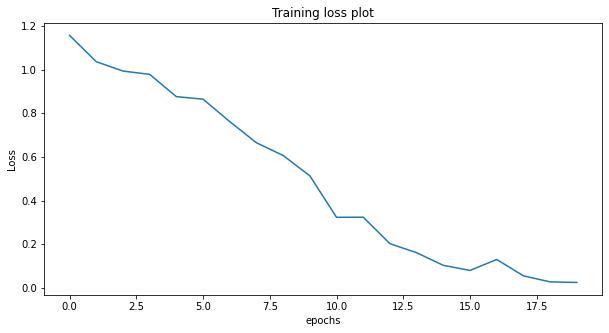

In [ ]:
error_plot(loss_all)

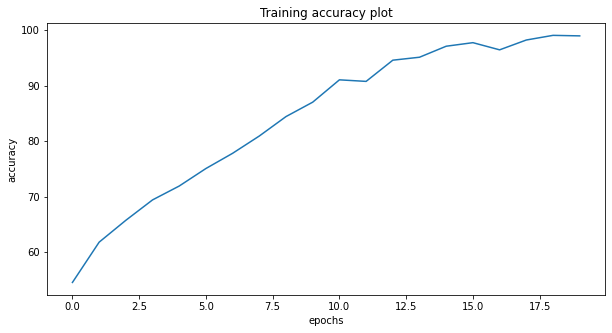

In [ ]:
acc_plot(acc_all)

# TESTING

In [ ]:
# UCF3
PATH = '/content/drive/My Drive/Datasets/weights_UCF3/c3d_19.h5'

In [ ]:
from model import resnet50
model = resnet50(class_num=8).to('cuda')
model.load_state_dict(torch.load(PATH))
# model.eval()

<All keys matched successfully>

In [ ]:
# TESTING ZONE #

from sklearn.metrics import confusion_matrix
from torch.autograd import Variable

phase = 'test'
epoch_metrics = {"loss": [], "acc": []}

predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')

for batch_i, (X, y) in enumerate(dataloaders_test[phase]):
    image_sequences = Variable(X.to(device), requires_grad=True)
    labels = Variable(y.to(device), requires_grad=False)
    optimizer.zero_grad()
    predictions = model(image_sequences)

    _, preds = torch.max(predictions, 1)
    predlist=torch.cat([predlist, preds.view(-1).cpu()])
    lbllist=torch.cat([lbllist, labels.view(-1).cpu()])

    loss = cls_criterion(predictions, labels)
    acc = 100 * (predictions.detach().argmax(1) == labels).cpu().numpy().mean()
    # print('acc : ',acc,' -- loss : ',loss.item())
    epoch_metrics["loss"].append(loss.item())
    epoch_metrics["acc"].append(acc)

# print(predlist)
# print(lbllist)
predlistCPU = predlist.cpu().detach().numpy()
lbllistCPU = lbllist.cpu().detach().numpy()
conf_mat = confusion_matrix(predlistCPU,lbllistCPU)
# print(conf_mat)

In [ ]:
# CONFUSION MATRIX FUNCTION #
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


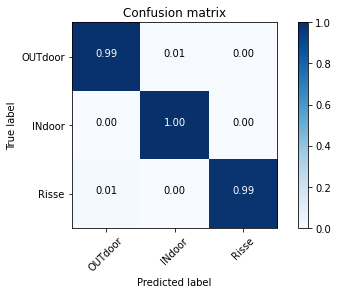

In [ ]:
plot_confusion_matrix(conf_mat, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(lbllistCPU, predlistCPU, target_names=classes))

              precision    recall  f1-score   support

     OUTdoor       0.99      1.00      0.99       274
      INdoor       1.00      0.98      0.99       111
       Risse       0.99      0.99      0.99        74

    accuracy                           0.99       459
   macro avg       0.99      0.99      0.99       459
weighted avg       0.99      0.99      0.99       459



In [ ]:
# ACC E LOSS #
print('acc_value : ', np.mean(epoch_metrics["acc"]))
print('loss_value : ', np.mean(epoch_metrics["loss"]))

acc_value :  99.13793103448276
loss_value :  0.02260926799022729
